In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\BISHT PAWAN KALYAN\Documents\Intern\VOIS\Major_Project\DoctorVisits.csv')

In [3]:
df.head(10)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
5,6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no,no,no
9,10,1,male,0.19,0.15,1,0,0,yes,no,no,no,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [5]:
duplicates = df.duplicated().sum()
print(duplicates)

0


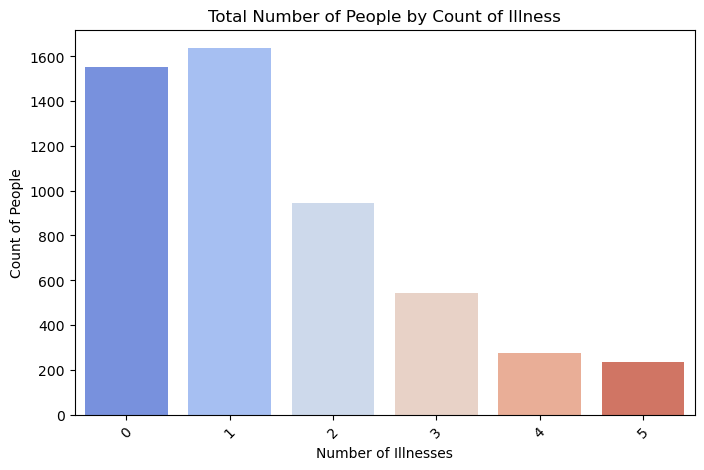

illness
0    1554
1    1638
2     946
3     542
4     274
5     236
Name: count, dtype: int64

In [6]:
illness_count = df['illness'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=illness_count.index, y=illness_count.values, palette='coolwarm')
plt.title("Total Number of People by Count of Illness")
plt.xlabel("Number of Illnesses")
plt.ylabel("Count of People")
plt.xticks(rotation=45)
plt.show()

illness_count

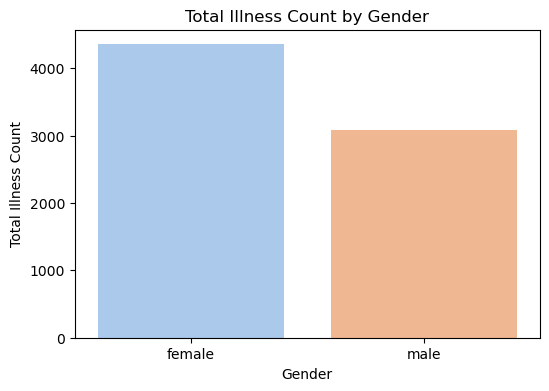

gender
female    4353
male      3079
Name: illness, dtype: int64

In [7]:
gender_illness = df.groupby('gender')['illness'].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_illness.index, y=gender_illness.values, palette='pastel')
plt.title("Total Illness Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Illness Count")
plt.show()

gender_illness

<function matplotlib.pyplot.show(close=None, block=None)>

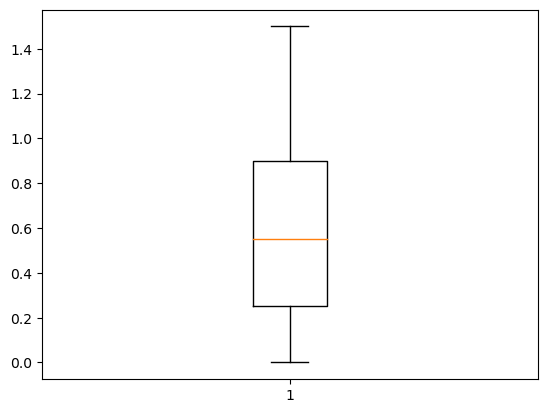

In [8]:
y = list(df.income)
plt.boxplot(y)
plt.show

In [9]:
# Grouping by 'gender' and 'reduced' but ensuring only numeric columns are averaged
df.groupby(['gender', 'reduced']).mean(numeric_only=True)

Unnamed: 0    visits       age    income   illness    health
gender reduced                                                               
female 0        2524.038512  0.229322  0.465755  0.482735  1.462144  1.115098
       1        1985.768421  0.400000  0.325684  0.542105  2.242105  1.610526
       2        1622.618182  0.672727  0.391455  0.560182  2.236364  1.781818
       3         997.311111  1.333333  0.403111  0.516000  2.733333  1.733333
       4        1237.740741  0.851852  0.458889  0.466667  2.222222  2.074074
       5        1169.055556  1.444444  0.401667  0.614444  2.222222  2.500000
       6        1382.545455  1.363636  0.426364  0.622727  2.363636  1.363636
       7        1034.846154  1.384615  0.436154  0.473462  2.653846  2.230769
       8        1883.090909  1.090909  0.471818  0.404545  2.181818  4.000000
       9        1349.000000  0.500000  0.570000  0.825000  3.000000  1.000000
       10       1099.428571  2.142857  0.512857  0.421429  2.571429  2.000000
       12       1661.000000  2.000000  0.720000  0.250000  3.500000  5.500000
       13        906.000000  4.000000  0.720000  0.300000  4.500000  3.500000
       14       1392.112069  1.543103  0.551724  0.427586  2.534483  4.112069
male   0        3008.911019  0.136007  0.344703  0.694398  1.099585  0.924850
       1        2485.158537  0.304878  0.286220  0.676341  1.743902  1.256098
       2        2007.679245  0.471698  0.343585  0.653019  2.358491  1.547170
       3        1909.068966  0.724138  0.334138  0.741379  2.137931  1.689655
       4        1424.000000  0.722222  0.309444  0.869444  2.055556  2.000000
       5        1437.272727  1.136364  0.331818  0.570455  2.272727  2.818182
       6         562.000000  0.833333  0.340000  0.591667  2.500000  2.000000
       7        1716.750000  0.750000  0.314167  0.655000  2.583333  4.333333
       8         680.666667  1.333333  0.365000  0.833333  2.666667  2.000000
       9        1375.400000  2.200000  0.310000  0.392000  2.400000  2.000000
       10       1543.200000  1.800000  0.480000  0.590000  2.600000  4.600000
       11        355.500000  5.000000  0.320000  1.000000  1.500000  0.500000
       12        781.500000  2.000000  0.370000  0.515000  1.500000  1.000000
       13        508.666667  4.000000  0.510000  0.350000  3.333333  2.333333
       14       1236.069444  1.555556  0.476806  0.598611  2.375000  3.527778

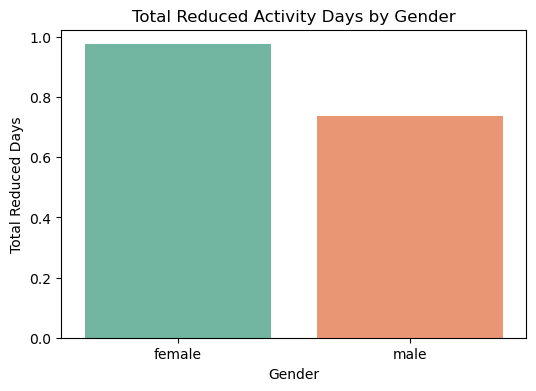

gender
female    0.975574
male      0.738344
Name: reduced, dtype: float64


In [10]:
reduced_activity_by_gender = df.groupby('gender')['reduced'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=reduced_activity_by_gender.index, y=reduced_activity_by_gender.values, palette='Set2')
plt.title("Total Reduced Activity Days by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Reduced Days")
plt.show()

print(reduced_activity_by_gender)

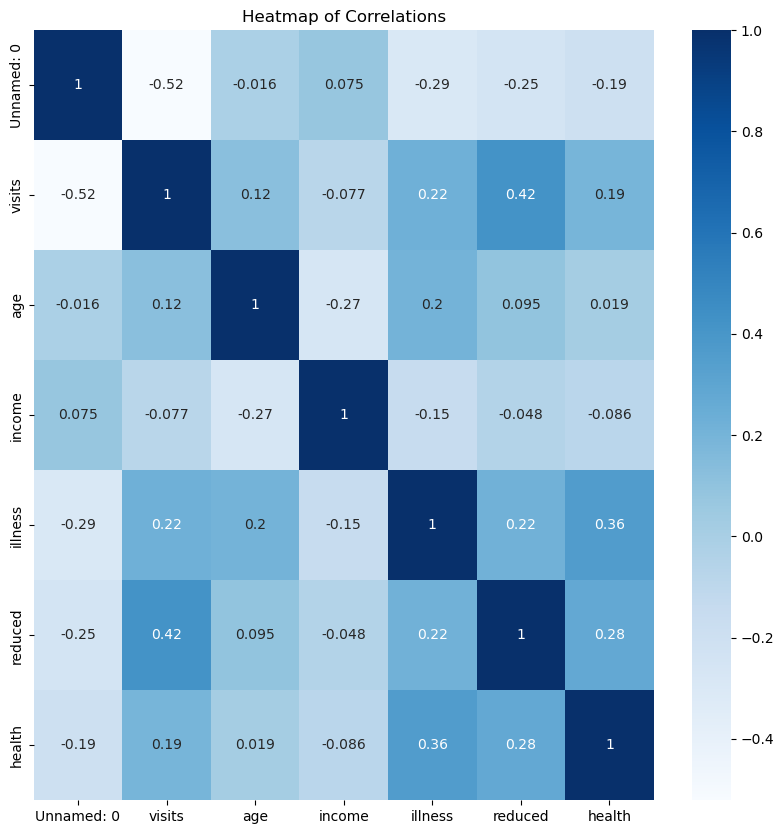

In [11]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), cbar=True, annot=True, cmap='Blues')
plt.title("Heatmap of Correlations")
plt.show()

Text(0, 0.5, 'visits')

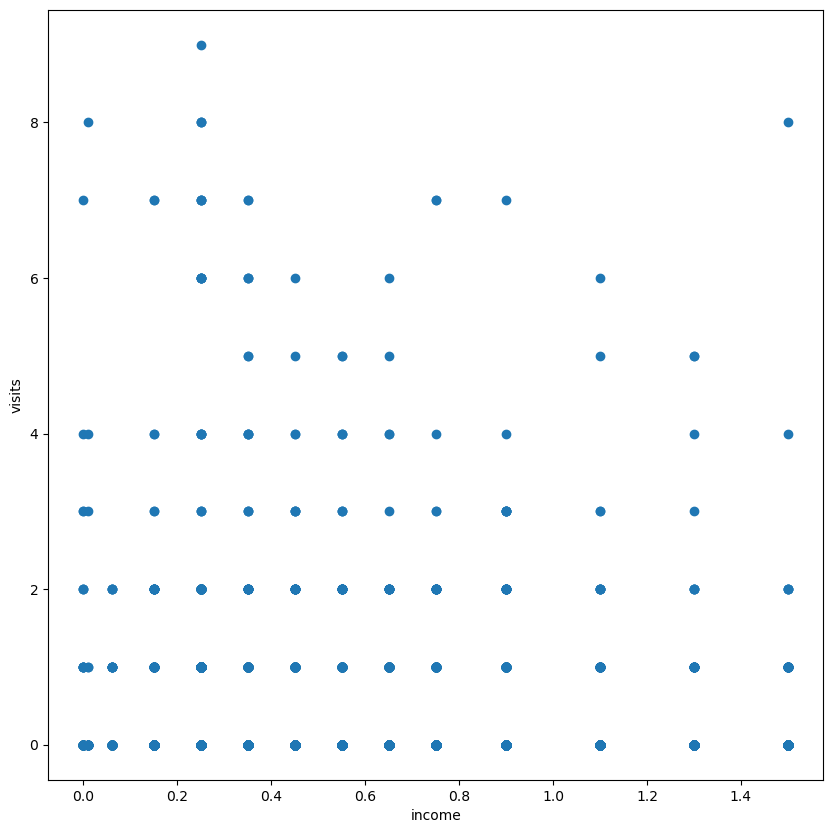

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(x = "income", y = "visits", data = df)
plt.xlabel("income")
plt.ylabel("visits")

<Axes: xlabel='gender', ylabel='Count'>

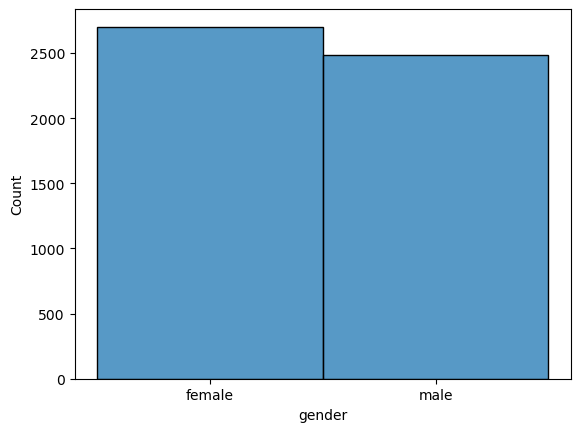

In [13]:
sns.histplot(df.gender, bins=2)

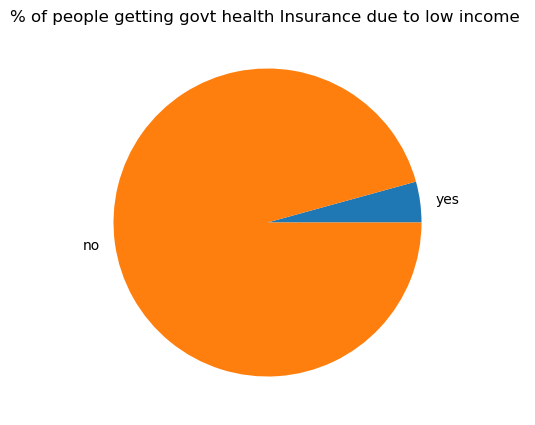

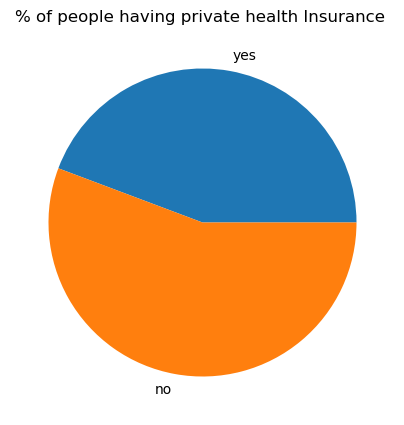

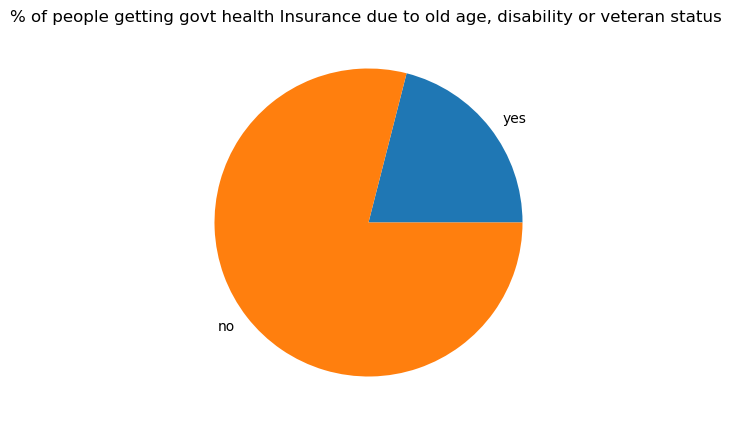

In [14]:
label=['yes', 'no']
Y = df[df['freepoor']=='yes']
N= df[df['freepoor']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=label)
plt.title("% of people getting govt health Insurance due to low income ")
plt.show()
#% of people having private Insurance
Y= df[df['private']=='yes']
N= df[df['private']=='no']
x = [Y.shape[0], N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=label)
plt.title("% of people having private health Insurance ")
plt.show()
#% of people geiſting govt Insurance due to old age, disability or veteran status
Y=df[df['freerepat']=='yes']
N= df[df['freerepat']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x, labels=label)
plt.title("% of people getting govt health Insurance due to old age, disability or veteran status ")
plt.show()

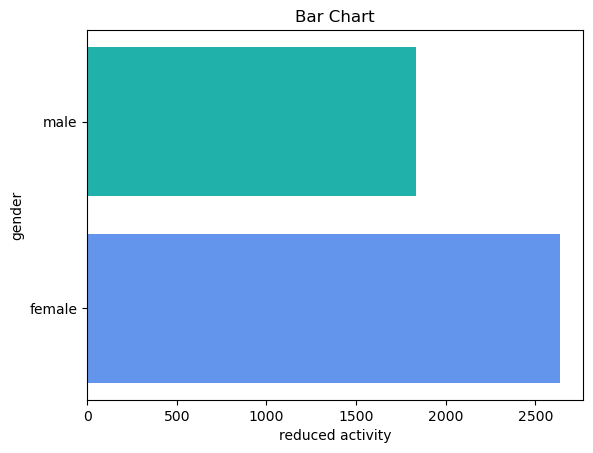

In [16]:
db= df.groupby('gender') ['reduced'].sum().to_frame().reset_index()
#Creating the bar chart
plt.barh(db['gender'], db['reduced'], color = ['cornflowerblue', 'lightseagreen'])
#Adding the aesthetics
plt.title('Bar Chart')
plt.xlabel('reduced activity')
plt.ylabel('gender')
#Show the plot
plt.show()

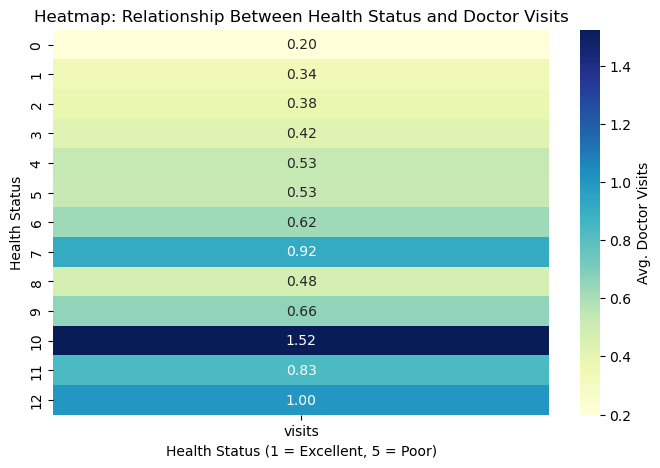

    health    visits
0        0  0.199273
1        1  0.335358
2        2  0.381166
3        3  0.417582
4        4  0.534759
5        5  0.530303
6        6  0.625000
7        7  0.918033
8        8  0.476190
9        9  0.656250
10      10  1.523810
11      11  0.833333
12      12  1.000000


In [20]:
health_status_impact = df.groupby('health')['visits'].mean().reset_index()

pivot_table = health_status_impact.pivot_table(values='visits', index='health')

# Plotting the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Avg. Doctor Visits'})
plt.title("Heatmap: Relationship Between Health Status and Doctor Visits")
plt.xlabel("Health Status (1 = Excellent, 5 = Poor)")
plt.ylabel("Health Status")
plt.xticks(rotation=0)
plt.show()

print(health_status_impact)

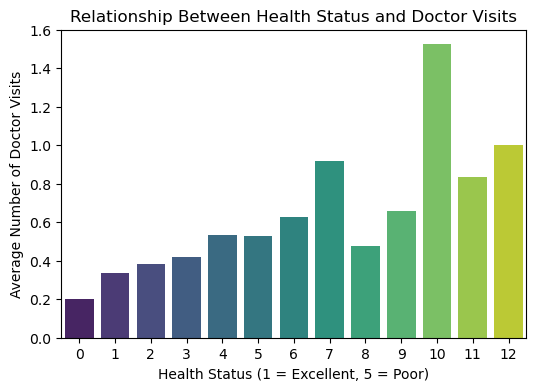

health
0     0.199273
1     0.335358
2     0.381166
3     0.417582
4     0.534759
5     0.530303
6     0.625000
7     0.918033
8     0.476190
9     0.656250
10    1.523810
11    0.833333
12    1.000000
Name: visits, dtype: float64


In [21]:
health_status_impact = df.groupby('health')['visits'].mean()

# Plotting the relationship between health status and doctor visits
plt.figure(figsize=(6, 4))
sns.barplot(x=health_status_impact.index, y=health_status_impact.values, palette='viridis')
plt.title("Relationship Between Health Status and Doctor Visits")
plt.xlabel("Health Status (1 = Excellent, 5 = Poor)")
plt.ylabel("Average Number of Doctor Visits")
plt.show()

print(health_status_impact)